In [6]:
from __future__ import print_function
import numpy as np
from scipy import stats
import os
import json
import pylab as pl
s = json.load(open('fbb_matplotlibrc.json'));
pl.rcParams.update(s)

import matplotlib
%matplotlib nbagg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## SIMULATED DATA: A SINE WAVE WITH A PERIOD OF 2$\pi$/10 . 
 # WHAT DOES IT LOOK LIKE IN FOURIER SPACE?

### creating a sine wave

PERIOD =  0.25 number of samples = 88 number of cycles = 8


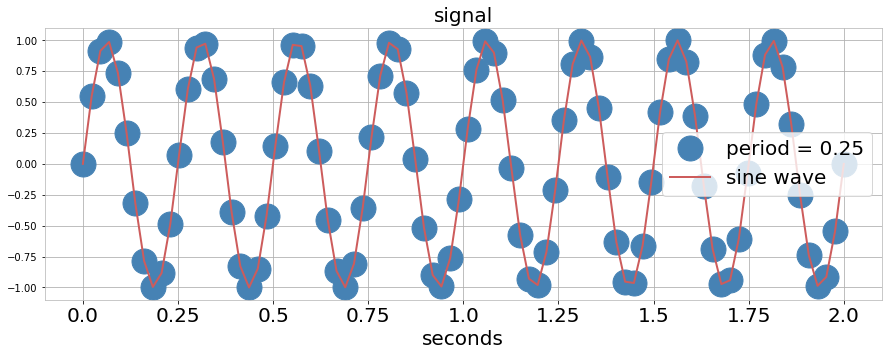

In [7]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

sample_rate = 44 #samples per seconds
duration = 2 #seconds

N = duration * sample_rate #samples (88)
freq = 8 / duration #8 cycles by design
period = 1.0 / freq #sine period (patterns repeats every period)

print ("PERIOD = ", period, "number of samples =", N, "number of cycles =", 8)
x = np.linspace(0, duration, num = N)
sinewave = np.sin(2 * np.pi * freq * x)
ax.plot(x, sinewave, '.', ms=50, label= "period = %.2f"%period);
ax.plot(x, sinewave, '-', label = "sine wave");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("seconds", fontsize=20)
pl.title("signal", fontsize=20);

In [8]:
np.fft?

Fourier transforms are complex numbers of real or complex imputs. Time series are real numbers so we can use rfft (the Fourier Transform of a **Real imput**, which is itself a complex number)

In [9]:
np.fft.rfft(sinewave) #j indicate complex: the second piece of ecery entry is its complex component

array([  1.95399252e-14 +0.00000000e+00j,
         4.35490450e-03 -1.21934578e-01j,
         1.82700300e-02 -2.55448398e-01j,
         4.47483236e-02 -4.16220390e-01j,
         9.08116366e-02 -6.31608806e-01j,
         1.73452110e-01 -9.61380410e-01j,
         3.42997525e-01 -1.57673418e+00j,
         8.35217103e-01 -3.27234830e+00j,
         1.21507055e+01 -4.13815028e+01j,
        -1.46636190e+00 +4.40571246e+00j,
        -8.14034759e-01 +2.18251165e+00j,
        -6.12519031e-01 +1.47875175e+00j,
        -5.15516238e-01 +1.12882310e+00j,
        -4.58993171e-01 +9.16951545e-01j,
        -4.22293059e-01 +7.73371995e-01j,
        -3.96735707e-01 +6.68662347e-01j,
        -3.78042305e-01 +5.88245309e-01j,
        -3.63863084e-01 +5.24062482e-01j,
        -3.52802544e-01 +4.71289024e-01j,
        -3.43981119e-01 +4.26854529e-01j,
        -3.36817888e-01 +3.88708564e-01j,
        -3.30914412e-01 +3.55427164e-01j,
        -3.25988781e-01 +3.25988781e-01j,
        -3.21836265e-01 +2.9964017

# to detect periodicity we use the "power spectrum": *square (or absolute value) of the real part of the fourier transform*


In [10]:
(np.fft.rfft(sinewave).real)**2

array([  3.81808678e-28,   1.89651932e-05,   3.33793997e-04,
         2.00241247e-03,   8.24675335e-03,   3.00856344e-02,
         1.17647302e-01,   6.97587609e-01,   1.47639645e+02,
         2.15021724e+00,   6.62652589e-01,   3.75179563e-01,
         2.65756991e-01,   2.10674731e-01,   1.78331427e-01,
         1.57399221e-01,   1.42915985e-01,   1.32396344e-01,
         1.24469635e-01,   1.18323010e-01,   1.13446290e-01,
         1.09504348e-01,   1.06268685e-01,   1.03578581e-01,
         1.01317984e-01,   9.94011955e-02,   9.77636956e-02,
         9.63560910e-02,   9.51400123e-02,   9.40852741e-02,
         9.31678660e-02,   9.23685077e-02,   9.16715931e-02,
         9.10644067e-02,   9.05365359e-02,   9.00794250e-02,
         8.96860339e-02,   8.93505749e-02,   8.90683088e-02,
         8.88353865e-02,   8.86487266e-02,   8.85059214e-02,
         8.84051655e-02,   8.83452043e-02,   8.83252986e-02])

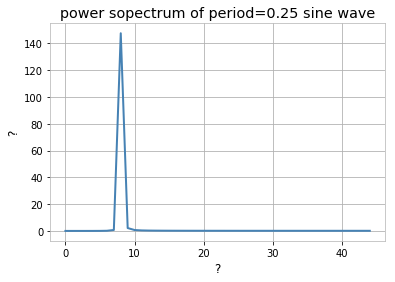

In [11]:
pl.plot(np.square((np.fft.rfft(sinewave).real)));
pl.title ("power sopectrum of period=%.2f sine wave"%period)
pl.xlabel("?")
pl.ylabel("?");

# the x axis is the frequency, and it is a bit tricky: it runs from 0 (period of 0 Hz) to the maximum frequency which is 1/2 the number of samples: 44 here. That is because I need at least 2 points to describe a pattern

### expressing the x axis in physical units: 1/sec = Hz

In [12]:
np.fft.rfftfreq?

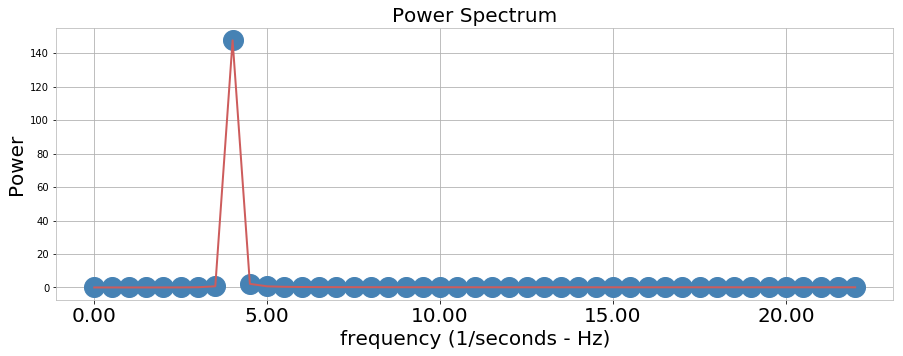

In [13]:
f = (np.fft.rfft(sinewave).real)**2

fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), (f), '-')

ax.set_xticklabels([ "%.2f"%(f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Power Spectrum", fontsize=20);

Use numpy.fft.rfft to take the fourier transform of the REAL part of your data (for time series you will always use only the real part) 

C:\Users\xihao\Anaconda2\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


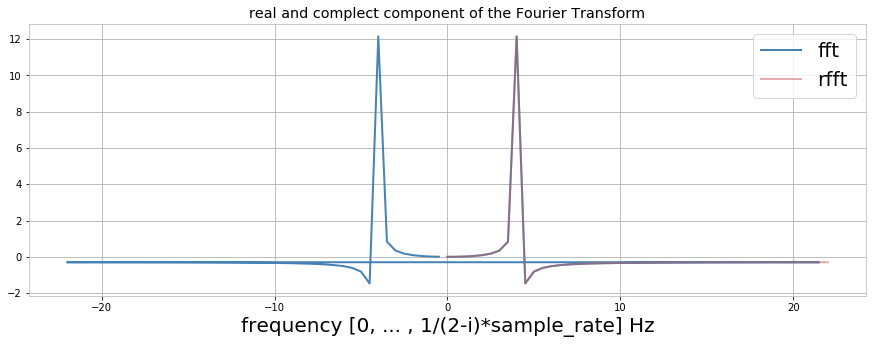

In [14]:

f = np.fft.fft(sinewave)

fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.fftfreq(N, 1.0/sample_rate), f, label="fft")
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), np.fft.rfft(sinewave), label="rfft", alpha=0.5)
pl.xlabel("frequency [0, ... , 1/(2-i)*sample_rate] Hz", fontsize=20);
pl.legend(fontsize=20)
pl.title ("real and complect component of the Fourier Transform");

take the absolute value of the FFT to suppress imaginary terms and get a positive POWE. (Same as using .real) - the power is the square of that

[  3.81808678e-28   1.48870065e-02   6.55876782e-02   1.75241826e-01
   4.07176438e-01   9.54337928e-01   2.60373797e+00   1.14058510e+01
   1.86006842e+03   2.15605195e+01]


Text(0.5,0,u'frequency [0, ... , 1/(2-i)*sample_rate] Hz')

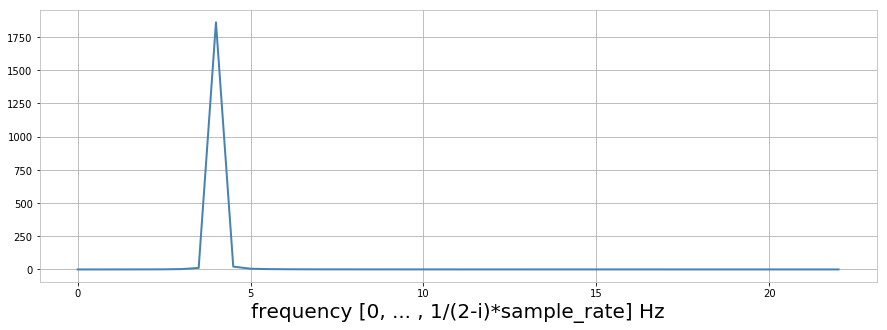

In [15]:
f = np.abs(np.fft.rfft(sinewave))**2
print (f[:10])
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), f)
pl.xlabel("frequency [0, ... , 1/(2-i)*sample_rate] Hz", fontsize=20)

In [20]:
f = np.abs(np.fft.rfft(sinewave))
fig=pl.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (seconds)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Power Spectrum", fontsize=20)

import plotly.plotly as py
from plotly.matplotlylib import Exporter, PlotlyRenderer

renderer = PlotlyRenderer()    # make shorcuts 
exporter = Exporter(renderer)
# Grab info from matplotlib figure
exporter.run(fig)
# Create JSON dictionary for use with Plotly
renderer.plotly_fig
py.iplot(renderer.plotly_fig, filename='s6_nitty-gritty')


C:\Users\xihao\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in double_scalars



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~faramir/0 or inside your plot.ly account where it is named 's6_nitty-gritty'


# example with real data: NYC trash pickup

really this is simulated data cause the original dataset is proprietary. The original ataset is analyzed here

[Patterns of waste generation: A gradient boosting model for short-term waste prediction in New York City](http://www.sciencedirect.com/science/article/pii/S0956053X17300375?via%3Dihub)

Nicholas E.Johnson et al (NYU CUSP), 2016


In [23]:
import pandas as pd
# this is an artificial dataset, mimiching the time behavior of trashpickup in NYC
trash = pd.read_csv("nyc_weekly_refuse.csv")
trash.head()
#trash.describe()

,weeks since 2001-01-04,Dump_Time_Stamp,Tons_Collected
0,1,2001-01-04,117.150486
1,2,2001-01-05,128.125022
2,3,2001-01-06,112.610515
3,4,2001-01-07,108.893304
4,5,2001-01-08,119.887403


There are n=209 datapoints in the series


Text(90,10,u'Sandy')

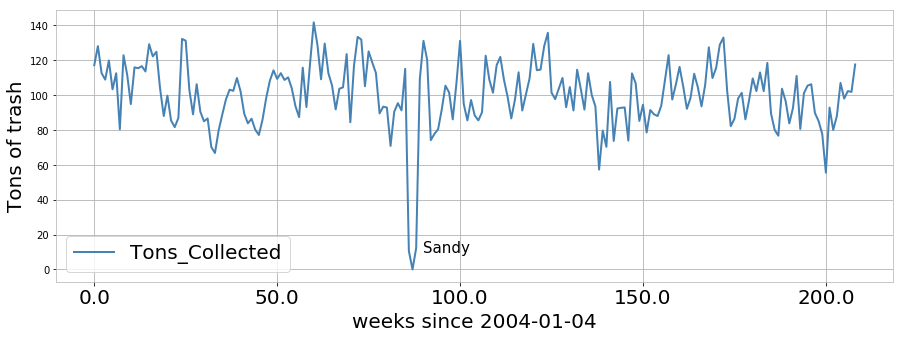

In [24]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
N = len(trash)
print ("There are n=%d datapoints in the series"%N)
ax = trash.plot(x='Dump_Time_Stamp', y='Tons_Collected', ax=ax)
#ax = trash.plot(x='Dump_Time_Stamp', y='Tons_Collected', ax=ax)
#ax.plot(trash.Dump_Time_Stamp, trash.Tons_Collected, '.', ms=50, label= "period = ?");
#ax.plot(trash.Dump_Time_Stamp, trash.Tons_Collected, '-', label = "trash pickup");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("weeks since 2004-01-04", fontsize=20)
pl.ylabel("Tons of trash", fontsize=20)
pl.annotate("Sandy", xy=[87,0], xytext=[90,10], fontsize=15)

C:\Users\xihao\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in double_scalars



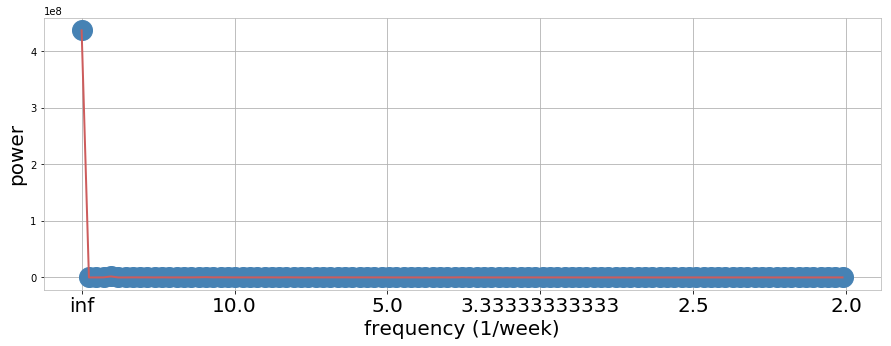

In [25]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.ylabel("power", fontsize=20)
pl.xlabel("frequency (1/week)", fontsize=20);

What is on the x-axis of the FFT?
The FT is calculated at: 

xax = [0, 1, ...,     N/2-1,     (N)/2] / (d*n) 

(xax = [0, 1, ...,     N/2-1,     (N-1)/2] / (d*n) of n is odd) in units of inverse frequency where n is the size of the input array and d is the Sample spacing: what is the distance between datapoints in input array in units of weeks the *sample spacing* here is 1 (1 measurement per week)

To get the FREQUENCY on the x axis we take 1.0/xax


In [26]:
print (" The first two frequency (slowest) caculated are \n1: infinity (1.0/0) ",
       "and \n2:the frequency corresponding to the entire duration of the series = N*d,"
       " \nand they should be removed because they are uninteresting\n",
       "freq: ", np.fft.rfftfreq(N, 1.0)[0], "= period: ", 1.0/np.fft.rfftfreq(N, 1.0)[0], "and\n",
       "freq: ", np.fft.rfftfreq(N, 1.0)[1], "= period: every %.1f"%(1.0/np.fft.rfftfreq(N, 1.0)[1]), "weeks\n\n")

print ("The fastest frequency you can calculate id every 1.0/2*d, "
       "called the Nyquist frequency\n",
       np.fft.rfftfreq(N, 1.0)[-1],  "or every %.1f"%(1.0/np.fft.rfftfreq(N, 1.0)[-1]), "weeks")

 The first two frequency (slowest) caculated are 
1: infinity (1.0/0)  and 
2:the frequency corresponding to the entire duration of the series = N*d, 
and they should be removed because they are uninteresting
 freq:  0.0 = period:  inf and
 freq:  0.00478468899522 = period: every 209.0 weeks


The fastest frequency you can calculate id every 1.0/2*d, called the Nyquist frequency
 0.497607655502 or every 2.0 weeks


C:\Users\xihao\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in double_scalars



Below I change *the x axis labels* (only the labels, I leave the location of the ticks as they are) to express the power spectrum in period instead of frequency. Period is 1/frequency

C:\Users\xihao\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

divide by zero encountered in double_scalars



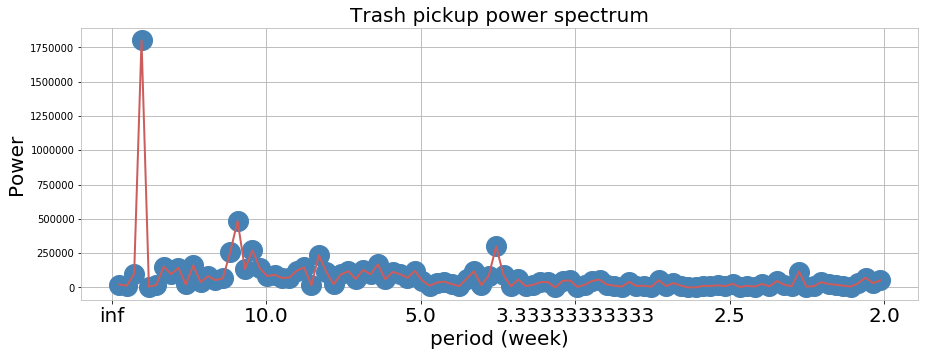

In [27]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')

# changing the labels on the x ticks to see the period instead of frequency
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (week)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20);

Below I am removing the first entry of the FFT output array because, as explained in point 2, it is not physically interesting and it is always a very large number. By plotting the points [1:], i.e. the FFT omitting its first value, i can see what happens much better, since the high value at [0] was forcing the y range in the plot to be very large. In your homework you will have to not only plot without the first (and likely second) elements of the FT but also no use them when you look for FT peaks to identify important periods.


C:\Users\xihao\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in double_scalars



Text(0.5,1,u'Trash pickup power spectrum')

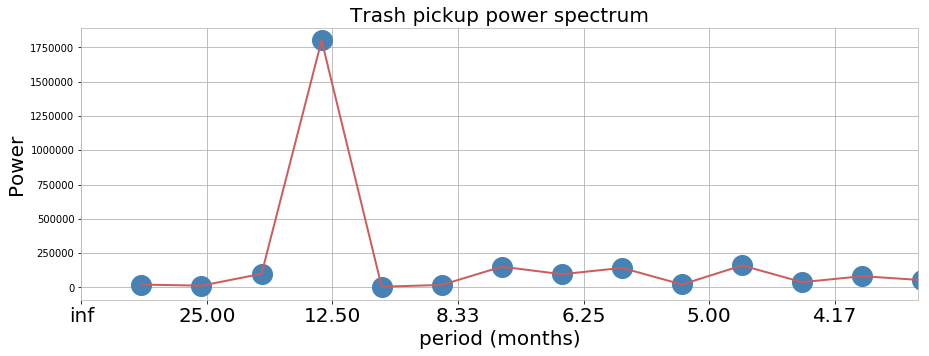

In [28]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xlim(0,1.0/15)
ax.set_xticklabels([ "%.2f"%(1/4./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (months)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20)

C:\Users\xihao\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in double_scalars



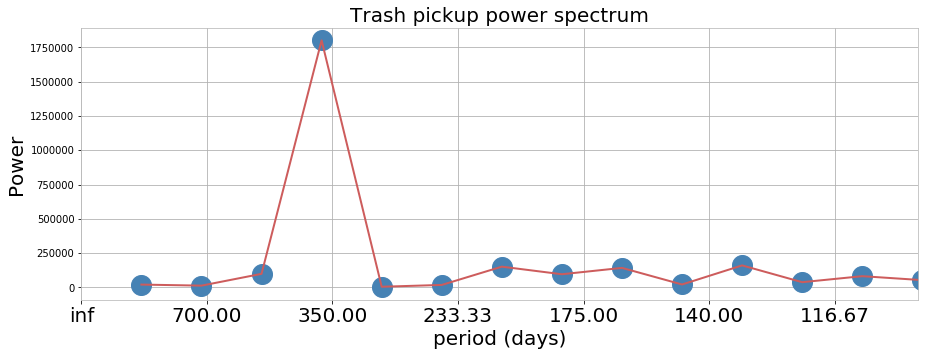

In [29]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xlim(0,1.0/15)
ax.set_xticklabels([ "%.2f"%(1*7./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (days)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20);

# the real data digitized from Johnson et al 2016 Figure 1
you can digitize data from images with the [WebplotDigitizer](https://automeris.io/WebPlotDigitizer/)

In [30]:
trash_digitized = pd.read_csv("trash_digitized.csv", index_col=0)

IOError: File trash_digitized.csv does not exist

In [31]:
Nd = len(trash_digitized)
f = np.abs(np.fft.rfft(trash_digitized.TonsCollected))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(Nd, 1.0)[2:], (f[2:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(Nd, 1.0)[2:], (f[2:]), '-')
ax.set_xticklabels(["%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.ylabel("power", fontsize=20)
pl.xlabel("frequency (1/week)", fontsize=20);
pl.xlim(pl.xlim()[0], 1.0/3);

NameError: name 'trash_digitized' is not defined

In [ ]:
np.where(f[2:] == f[2:].max())[0] + 2, np.where(f[12:] == f[12:].max())[0] + 12, \
np.where(f[23:] == f[23:].max())[0] + 23

In [ ]:
print ("most important  periods: ")
print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(Nd, 1.0)[11]))
print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(Nd, 1.0)[22]))
print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(Nd, 1.0)[44]))

these are aliases of the same period : aliasing is a very common issue with periodicity analysis (that is why they are multiples of each other, they are harmonic frequencies)